# Dependencias necesarias
Primero vamos a instalar e importar todas las librerías necesarias.

In [ ]:
!pip install --upgrade pip
!pip install pandas==1.5.3 seaborn==0.12.2 matplotlib==3.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importamos las librerias necesarias.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Carga de datos:

Lo siguiente es traer la información que vamos a explorar.

In [ ]:
# Cargamos la data en la variable demografic Data o demoData.
demoData = pd.read_csv('https://raw.githubusercontent.com/crjahe26/pruebaNequi/master/data/bank_transactions.csv')

# Verificar la estructura del dataset y visualizar las primeras filas

Continuamos validando la estructura de nuestro dataset, vamos a comprender su tamaño y dimensiones, tambien vamos a obtener una idea de cómo están organizados los datos y qué tipo de información contienen.

In [ ]:
print("La cantidad de filas que tenemos es:", demoData.shape[0],
      "\nY la cantidad de columnas es:", demoData.shape[1],
      "\n\nLas primeras columnas de nuestro data set nos arrojan la siguiente información:")

demoData.head()

La cantidad de filas que tenemos es: 1048567 
Y la cantidad de columnas es: 9 

Las primeras columnas de nuestro data set nos arrojan la siguiente información:


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
#demoData.sort_values(by="TransactionTime", ascending=True)
#demoData.nsmallest(10000, 'TransactionTime')
#max(demoData["TransactionTime"])

# Explorar los tipos de datos y resumir la información

Ahora vamos a validar de que tipos de datos se compone nuestro data set, y posteriormente vamos a validar un resumen estadistico básico.

In [ ]:
demoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


Aquí ya empezamos a identificar un par de cosas, como que varias columnas tienen valores nulos, ademas de que varios tipos de las columnas no corresponden o no son demasiado manejables, vamos a corroborarlo igualmente.


In [ ]:
demoData.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

Podemos ver que solo algunos datos tienen un formato adecuado, por lo tanto debemos realizar algunos cambios en estos para poder trabajar con ellos correctamente y vamos a agregar una columna llamada "CustomerAge" a partir de la columna llamada "CustomerDOB" y la columna TransactionDate para saber la edad de los clientes al momento de realizar la transacción.


In [ ]:
# Fecha de nacimiento -> datetime
demoData["CustomerDOB"] = pd.to_datetime(demoData["CustomerDOB"])

# Fecha de la transacción -> datetime
demoData["TransactionDate"] = pd.to_datetime(demoData["TransactionDate"])

# Fecha de la transacción - fecha de nacimiento = edad del cliente al momento de la transacción.
demoData["CustomerAge"] = demoData["TransactionDate"].dt.year - demoData["CustomerDOB"].dt.year

A continuación vamos a tomar el tiempo de la transacción, separarlo en pares de caracteres que indican nuestra hora en formato militar, luego lo pasamos a formato date time.

In [ ]:
demoData['TransactionTime'] = pd.to_datetime(demoData['TransactionTime'].astype(str).str.zfill(6),
                                             format='%H%M%S')

Creamos una columna con la unión de la fecha y la hora de la transacción.

In [ ]:
demoData["TransactionDateTime"] = pd.to_datetime(
  (demoData["TransactionDate"].dt.date).astype(str)
  + ' ' +
  (demoData["TransactionTime"].dt.time).astype(str)
)

Vamos a validar nuevamente los tipos de datos de nuestras columnas.

In [ ]:
demoData.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime            datetime64[ns]
TransactionAmount (INR)           float64
CustomerAge                       float64
TransactionDateTime        datetime64[ns]
dtype: object

Como vemos ya tenemos varios tipos de datos de columnas importantes como debería ser.

Ahora lo que haremos será un breve resumen  estadistico para validar información como la media, desviación estándar, valores mínimos y máximos, percentiles, etc., para las columnas numéricas. Esto nos ayudará a comprender la distribución y las características de los datos.

In [ ]:
demoData.describe().round(1)

,CustAccountBalance,TransactionAmount (INR),CustomerAge
count,1046198.0,1048567.0,1045170.0
mean,115403.5,1574.3,33.1
std,846485.4,6574.7,49.0
min,0.0,0.0,-56.0
25%,4721.8,161.0,24.0
50%,16792.2,459.0,28.0
75%,57657.4,1200.0,33.0
max,115035495.1,1560035.0,216.0


# Valores nulos o duplicados

Continuamos la validación revisando nuestro dataset para validar que este no tenga valores nulos o valores duplicados.

In [ ]:
null = demoData.isnull().sum()
nullTable = pd.DataFrame({'Columna': demoData.columns, 'Valores nulos': null})
nullTable = nullTable.reset_index(drop=True)
nullTable

,Columna,Valores nulos
0,TransactionID,0
1,CustomerID,0
2,CustomerDOB,3397
3,CustGender,1100
4,CustLocation,151
5,CustAccountBalance,2369
6,TransactionDate,0
7,TransactionTime,0
8,TransactionAmount (INR),0
9,CustomerAge,3397


Podemos ver que tenemos varias columnas con valores nulos.

In [ ]:
duplicates = demoData.duplicated().sum()
duplicatesTable = pd.DataFrame({'Columna': demoData.columns, 'Duplicados': duplicates})
duplicatesTable

,Columna,Duplicados
0,TransactionID,0
1,CustomerID,0
2,CustomerDOB,0
3,CustGender,0
4,CustLocation,0
5,CustAccountBalance,0
6,TransactionDate,0
7,TransactionTime,0
8,TransactionAmount (INR),0
9,CustomerAge,0


No tenemos registros duplicados duplicados.

# Identificar valores atípicos

## TransactionID
Para validar datos atipicos en nuestra columna **TransactionID** se podría identificar si encontraramos valores duplicados, ya que la naturaleza de los IDs de las transacciones realizadas es que sean unicos.

In [ ]:
demoData.duplicated('TransactionID').sum()

0

## CustomerID
Respecto a los **CustomerID** sería normal encontrarnos con valores duplicados debido a que un solo cliente puede realizar más de una transacción, por el contrario sería extraño encontrarnos con cero duplicados en este apartado.

In [ ]:
demoData.duplicated('CustomerID').sum()

164302

## CustomerDOB - TransactionDate - TransactionTime

Los valores atípicos en estas columnas podrían ser identificados si hay fechas de nacimiento que están fuera de un rango lógico o si hay fechas futuras. Por ejemplo, si hay fechas de nacimiento que son anteriores a una fecha mínima esperada o posteriores a la ultima fecha de actualización de este dataset en Kaggel es decir hace 2 años.

In [ ]:
fecha_actual = pd.Timestamp(year=2021, month=1, day=1)
fecha_minima = pd.Timestamp(year=1900, month=1, day=1)
#fechas_invalidas = demoData[(demoData['CustomerDOB'] > fecha_actual) | (demoData['CustomerDOB'] < fecha_minima)]
((demoData['CustomerDOB'] > fecha_actual) | (demoData['CustomerDOB'] < fecha_minima)).sum()

141645

Estos 141645 se deberían analizar y definir que se haría con ellos validando la fuente de los datos o validando si tan solo se trata de un error para tener conocimiento al momento de definir si se eliminan o se le da un trato especial, en este caso lo que haremos será eliminar todos estos registros, más adelante en el apartado de limpieza de datos.

In [ ]:
((demoData['TransactionDate'] > fecha_actual) | (demoData['TransactionDate'] < fecha_minima)).sum()

0

In [ ]:
print('La minima hora encontrada es:', min(demoData['TransactionTime'].dt.time)
, '\nLa máxima hora encontrada es:', max(demoData['TransactionTime'].dt.time))

La minima hora encontrada es: 00:00:00 
La máxima hora encontrada es: 23:59:59


Con TransactionDate y TransactionTime no tenemos ningún problema ya que todos los datos se encuentran dentro de los rangos que se deberían encontrar.

## CustGender

Los valores atípicos en esta columna podrían ser identificados si hay categorías de género que no se ajustan a las opciones esperadas. Por ejemplo, si hay categorías que no son "Masculino" o "Femenino" o si hay valores inesperados o mal escritos.

In [ ]:
#categorias_inesperadas = demoData[~demoData['CustGender'].isin(['M', 'F'])]
#categorias_inesperadas

# Cantidad de valores diferentes a M y F.
(~demoData['CustGender'].isin(['M', 'F'])).sum()

1101

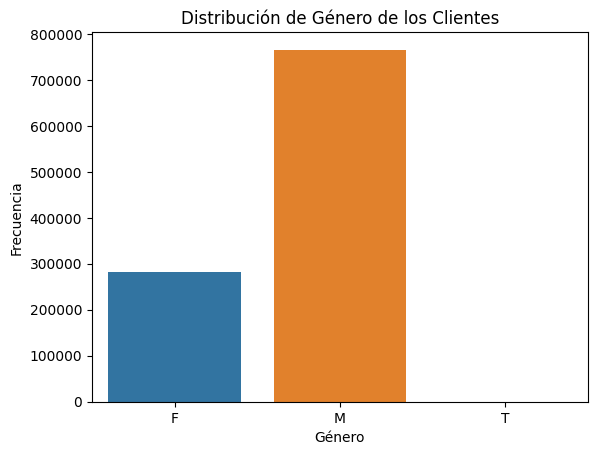

In [ ]:
sns.countplot(x='CustGender', data=demoData)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Distribución de Género de los Clientes')
plt.show()

En este caso para la variable CustGender encontramos 1101 valores que no corresponden a M o F, podríamos decir que está mal o podríamos pensar en que son clientes que no quisieron compartir esta información, al trabajar con los datos de Nequi por ejemplo, sabríamos o podríamos consultar si esto es un caso normal y se debe dejar tal cual o si por el contrario es algo atípico y debemos darle un manejo determinado.

## CustLocation

Los valores atípicos en esta columna podrían ser identificados si hay ubicaciones que no se ajustan a un conjunto de opciones predefinidas o si hay valores inesperados o inconsistentes.

In [ ]:
#uniqueLocations = pd.DataFrame(demoData['CustLocation'].unique())
#uniqueLocationsa

len(demoData['CustLocation'].unique())

9356

Para este caso de forma similar al anterior necesitaríamos saber cuales son las ubicaciones validas para poder identificar las ubicaciones que no tienen sentido, en este data set tenemos 9356 ubicaciones distintas.

## CustAccountBalance

En esta columna los datos atípicos podrían ser identificados si hay saldos de cuenta que están muy por encima o por debajo de un rango lógico. Por ejemplo, si hay valores negativos o valores extremadamente altos que parecen ser errores o anomalías.

Para nuestro analisis vamos a multiplicar los valores de esta columna por 0.012 que es el valor de 1 Rupia india en USD hoy 23 de junio del 2023 y esto nos ayuda a tratar y entender mejor los datos.

In [ ]:
demoData['CustAccountBalance'] = demoData['CustAccountBalance'] * 0.012

(demoData['CustAccountBalance']).describe().round(1)

count    1046198.0
mean        1384.8
std        10157.8
min            0.0
25%           56.7
50%          201.5
75%          691.9
max      1380425.9
Name: CustAccountBalance, dtype: float64

- **Media (mean):** El valor promedio de "CustAccountBalance" es 1384.8. Esta estadística nos proporciona una idea del valor típico o central de la columna. En este caso, indica que el saldo de la cuenta promedio de los clientes está alrededor de 1384.8 dolares.
- **Desviación estándar (std):** La desviación estándar de "CustAccountBalance" es 10157.8. Esta medida muestra la dispersión de los datos alrededor de la media. Una desviación estándar alta nos indica que los valores de la columna se extienden ampliamente desde la media.
- **Valor mínimo (min) y valor máximo (max):** El valor mínimo de "CustAccountBalance" es 0.0, lo que indica que hay clientes con saldo de cuenta cero y tiene mucho sentido, es perfecto que no nos hayamos encontrado con valores negativos. El valor máximo es 1380425.9, lo que sugiere que algunos clientes tienen saldos muy altos. Estos valores extremos pueden requerir una atención especial, ya que pueden ser atípicos o indicar una situación particular, por ejemplo si se tratara de datos de Nequi y estuvieramos trabajando con cuentas que no han roto los topes en la aplicación, se trataría de un error al cual se le debería dar un manejo especial.
- **Cuartiles (25%, 50%, 75%):** Los cuartiles proporcionan información sobre la distribución de los datos. El percentil 25 (primer cuartil) es 56.7, el percentil 50 (segundo cuartil o mediana) es 201.5, y el percentil 75 (tercer cuartil) es 691.9. Estos valores dividen los datos en cuatro partes iguales, lo que muestra cómo se distribuyen los saldos de las cuentas en diferentes rangos.


## TransactionAmount (INR)

En este caso tenemos algo similar que con la anterior columna, así que lo trataremos de la misma forma.

In [ ]:
demoData['TransactionAmountUSD'] = demoData['TransactionAmount (INR)'] * 0.012

(demoData['TransactionAmountUSD']).describe().round(1)

count    1048567.0
mean          18.9
std           78.9
min            0.0
25%            1.9
50%            5.5
75%           14.4
max        18720.4
Name: TransactionAmountUSD, dtype: float64

De forma similar al caso anterior tenemos las cuatro medidas estadisticas que nos dan una idea de como están distribuidos los datos, para este caso podemos notar que los datos en cuanto a transacciones se refiere están mucho menos dispersos que en cuanto al balance de las cuentas.

# Limpieza de los datos

De acuerdo a lo que hemos encontrado con los pasos anteriores debemos realizar una limpieza de los datos, ya que en este caso no consultaremos con el dueño de los mismos, así que los eliminaremos.

## CustomerAge - CustomerDOB

Empezaremos eliminando todos los registros que tienen una edad invalida como que sea negativa o que sea mayor a 110, adicionalmente tomaremos como edad valida la misma edad desde la que puedes abrir una cuenta en Nequi, mayor a 13 años, es decir que tambien eliminaremos los registros con fechas que no tienen sentido de la columna CustomerDOB ya que la columna CustomerAge se genera haciendo uso de CustomerDOB.<br>

Posteriormente pasamos el valor de edad como tipo de dato entero.

In [ ]:
demoData = demoData[demoData['CustomerAge'] >= 13]
demoData = demoData[demoData['CustomerAge'] <= 110]

demoData["CustomerAge"] = demoData["CustomerAge"].astype(int)

<ipython-input-25-550f925f4da0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demoData["CustomerAge"] = demoData["CustomerAge"].astype(int)


In [ ]:
demoData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903185 entries, 0 to 1048566
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            903185 non-null  object        
 1   CustomerID               903185 non-null  object        
 2   CustomerDOB              903185 non-null  datetime64[ns]
 3   CustGender               903185 non-null  object        
 4   CustLocation             903034 non-null  object        
 5   CustAccountBalance       901186 non-null  float64       
 6   TransactionDate          903185 non-null  datetime64[ns]
 7   TransactionTime          903185 non-null  datetime64[ns]
 8   TransactionAmount (INR)  903185 non-null  float64       
 9   CustomerAge              903185 non-null  int64         
 10  TransactionDateTime      903185 non-null  datetime64[ns]
 11  TransactionAmountUSD     903185 non-null  float64       
dtypes: datetime64[n

## TransactionAmountUSD
Algo que también es importante tener en cuenta en el análisis de los datos es validar valores que no tengan sentido para nuestro caso el data set contiene datos de transacciones entonces transacciones con un valor de cero no nos interesan así que vamos a validar que no tengamos este tipo de transacciones.

In [ ]:
demoData = demoData[demoData["TransactionAmountUSD"] != 0]

Vamos a redondear los valores monetarios a dos cifras decimales.

In [ ]:
demoData = demoData.round({'TransactionAmountUSD': 2, 'CustAccountBalance': 2})

## Eliminar nulos

### CustAccountBalance - CustLocation - CustGender

In [ ]:
demoData = demoData[demoData["CustAccountBalance"].isnull() == False]
demoData = demoData[demoData["CustLocation"].isnull() == False]
demoData = demoData[demoData["CustGender"].isnull() == False]

In [ ]:
demoData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900402 entries, 0 to 1048566
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            900402 non-null  object        
 1   CustomerID               900402 non-null  object        
 2   CustomerDOB              900402 non-null  datetime64[ns]
 3   CustGender               900402 non-null  object        
 4   CustLocation             900402 non-null  object        
 5   CustAccountBalance       900402 non-null  float64       
 6   TransactionDate          900402 non-null  datetime64[ns]
 7   TransactionTime          900402 non-null  datetime64[ns]
 8   TransactionAmount (INR)  900402 non-null  float64       
 9   CustomerAge              900402 non-null  int64         
 10  TransactionDateTime      900402 non-null  datetime64[ns]
 11  TransactionAmountUSD     900402 non-null  float64       
dtypes: datetime64[n

Como podemos ver ahora todas las columnas tienen la misma cantidad de registros, esto nos dice que no tenemos valores nulos.

## Eliminar columnas innecesarias.

Podemos quitar columnas que se hayan creado durante el analisis, en este caso lo que haremos será eliminar la columna del monto de la transacción ya que no vamos a utilizar la moneda india para continuar con los analisis, nos quedaremos con su valor en dolares que encontramos en la columna 'TransactionAmountUSD'.<br>

Adicionalmente vamos a eliminar las columnas 'TransactionDate', 'TransactionTime' ya que su información puede ser extraida de la columna llamada 'TransactionDateTime' que creamos anteriormente.

In [ ]:
demoData = demoData.drop(['TransactionAmount (INR)', 'TransactionDate', 'TransactionTime'], axis=1)

# Exportamos el archivo como CSV

In [ ]:
demoData.to_csv('/content/demograficData.csv', index=False)